In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import re

In [13]:
column_names = ['ID', 'game', 'sentiment', 'text']
data = pd.read_csv('../data/tweet_data.csv',names=column_names)


In [14]:
data.head()

,ID,game,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [15]:
data.columns

Index(['ID', 'game', 'sentiment', 'text'], dtype='object')

In [19]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

data['clean_text'] = data['text'].apply(clean_text)

In [20]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [21]:
data['sentiment'] = data['clean_text'].apply(get_sentiment)

In [22]:
text = ' '.join(data['clean_text'])
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)

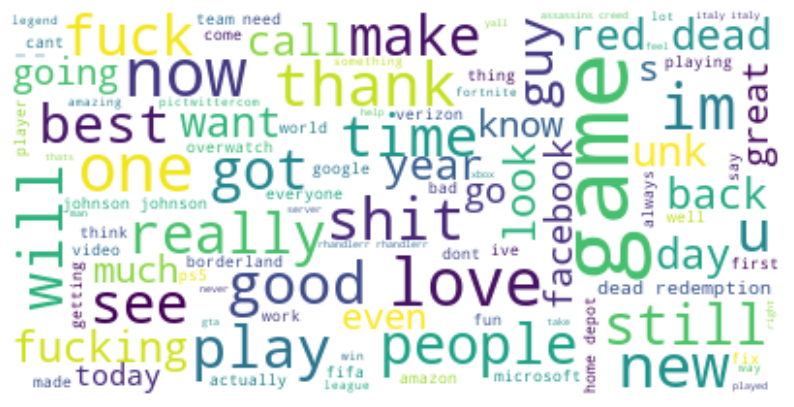

In [23]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('../images/wordcloud.png')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


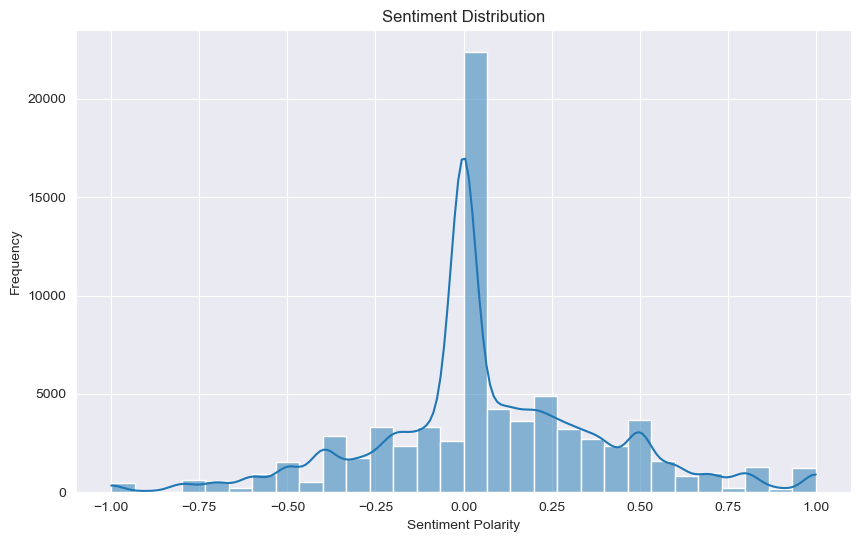

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('../images/sentiment_distribution.png')
plt.show()